In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt

### MLB Player page loads

In [78]:

player_page_loads = pd.read_gbq('''
        

    WITH initial_query AS (

    SELECT DISTINCT page_url, visit
    FROM `mlb-bdataml-prod-da8f.video_recommendation_engine_clickstream.page_loads`

        WHERE (page_url LIKE '%mlb.com/player/%')
        AND date_time_date >= '2021-07-01' AND date_time_date < '2021-08-31'
    )




        SELECT page_url, count(*) as visits
        FROM initial_query
        GROUP BY page_url
        ORDER BY 2 desc
        
        


        ''' )

Downloading: 100%|██████████| 146404/146404 [00:04<00:00, 34836.57rows/s]


In [79]:
names = []
for i in player_page_loads['page_url']:
    if '?' in i:
        m = re.search('[^\/]+(.)?\?', i)
        temp = m.group(0)
        names.append(temp[:-1])
    else:
        m = re.search('[^/]+(?=/$|$)', i)
        if '#' in m.group(0):
            n = re.search('^[^#]*',m.group(0))
            names.append(n.group(0))
        else:
            names.append(m.group(0))

In [80]:
full_player_page = player_page_loads

In [5]:
def parse_player_ids(player_page):
    #player_page = df.query("source == 'player_page'")
    player_page['player_id'] = player_page['page_url'].str[-6:]
    player_page['is_id'] = player_page['player_id'].str.contains(r'^[0-9]{6}')

    player_page['player_id'] = np.where(player_page.is_id == False, \
                                player_page['page_url'].str.split('?') \
                                        .str[0].str[-6:], player_page.player_id)
    player_page['is_id'] = player_page['player_id'].str.contains(r'^[0-9]{6}')

    player_page['player_id'] = np.where(player_page.is_id == False, \
                               player_page['page_url'].str.split('#') \
                               .str[0].str[-6:], player_page.player_id)
    player_page['is_id'] = player_page['player_id'].str.contains(r'^[0-9]{6}')

    
    player_page = player_page.query("is_id == True") # drop missing player_ids
        
    return player_page

In [81]:
full_player_page['construct'] = names
full_player_page['name'] = full_player_page['construct'].apply(lambda x: "-".join(x.split("-")[:2]))
full_player_page['name'] = full_player_page['name'].apply(lambda x: x.replace('-',' '))

In [82]:
full_player_page = parse_player_ids(player_page_loads)

In [83]:
full_player_page

,page_url,visits,construct,name,player_id,is_id
0,https://urldefense.com/v3/__https://www.mlb.com/player/shohei-ohtani-660271__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqU13e5xGw$,966179,shohei-ohtani-660271,shohei ohtani,660271,True
1,https://urldefense.com/v3/__https://www.mlb.com/player/hyun-jin-ryu-547943__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqXd5q0lQw$,240422,hyun-jin-ryu-547943,hyun jin,547943,True
2,https://urldefense.com/v3/__https://www.mlb.com/player/kwang-hyun-kim-547942__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqULQkgytw$,216665,kwang-hyun-kim-547942,kwang hyun,547942,True
3,https://urldefense.com/v3/__https://www.mlb.com/player/vladimir-guerrero-j__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqXeSZOLkw$ ...,206479,vladimir-guerrero-jr-665489,vladimir guerrero,665489,True
4,https://urldefense.com/v3/__https://www.mlb.com/player/miguel-cabrera-408234__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqVdOSKZAQ$,173622,miguel-cabrera-408234,miguel cabrera,408234,True
...,...,...,...,...,...,...
146399,https://urldefense.com/v3/__https://www.mlb.com/player/joel-payamps-606303__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqUxaJ8RXA$ ...,1,joel-payamps-606303,joel payamps,606303,True
146400,https://urldefense.com/v3/__https://www.mlb.com/player/paul-masterson-118409__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqX7WQMSOA$,1,paul-masterson-118409,paul masterson,118409,True
146401,https://urldefense.com/v3/__https://www.mlb.com/player/richard-lovelady-66__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqVV9iOBmg$ ...,1,richard-lovelady-663992,richard lovelady,663992,True
146402,https://urldefense.com/v3/__https://www.mlb.com/player/frank-schwindel-643__;!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqVDEUdPeA$ ...,1,frank-schwindel-643524,frank schwindel,643524,True


### Similarweb data

In [20]:
metrics = pd.read_csv('data/player_search_metrics.csv')

In [22]:
metrics = metrics[['Keywords', '2021-07', '2021-08']]

In [74]:
metrics['2021-07'] = metrics['2021-07'].str.replace(',', '').astype(float)
metrics['2021-08'] = metrics['2021-08'].str.replace(',', '').astype(float)


In [75]:
metrics

,Keywords,2021-07,2021-08
0,shohei ohtani,3522067.0,1526172.0
1,freddie freeman,214942.0,196105.0
2,mike trout,874295.0,676181.0
3,max scherzer,948819.0,456773.0
4,jacob degrom,518797.0,239974.0
...,...,...,...
96,robert hassell,8748.0,5833.0
97,xavier edwards,4989.0,4199.0
98,robert hassell iii,6279.0,688.0
99,ke’bryan hayes,1305.0,1855.0


In [76]:
metrics['visits2'] = metrics['2021-07'] + metrics['2021-08']

In [77]:
metrics

,Keywords,2021-07,2021-08,visits2
0,shohei ohtani,3522067.0,1526172.0,5048239.0
1,freddie freeman,214942.0,196105.0,411047.0
2,mike trout,874295.0,676181.0,1550476.0
3,max scherzer,948819.0,456773.0,1405592.0
4,jacob degrom,518797.0,239974.0,758771.0
...,...,...,...,...
96,robert hassell,8748.0,5833.0,14581.0
97,xavier edwards,4989.0,4199.0,9188.0
98,robert hassell iii,6279.0,688.0,6967.0
99,ke’bryan hayes,1305.0,1855.0,3160.0


In [84]:
pages = full_player_page

In [85]:
pages['Keywords'] = pages['name']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://urldefense.com/v3/__https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html*returning-a-view-versus-a-copy*5Cn__;IyU!!Mih3wA!Ek7nlM8V8AZCy_6UlJYr65LfRvD9ZjQk2iwdXVNmdCqXn2REIaSmy_HgJrpQwVhkVESbYCs4pPocoqXHWaGMrQ$    """Entry point for launching an IPython kernel.


In [86]:
pages = pages.drop(columns = ['name', 'construct', 'page_url', 'is_id'])

In [87]:
pages

,visits,player_id,Keywords
0,966179,660271,shohei ohtani
1,240422,547943,hyun jin
2,216665,547942,kwang hyun
3,206479,665489,vladimir guerrero
4,173622,408234,miguel cabrera
...,...,...,...
146399,1,606303,joel payamps
146400,1,118409,paul masterson
146401,1,663992,richard lovelady
146402,1,643524,frank schwindel


### merging the two datasets after cleaning the data

In [91]:
merged = pages.merge(metrics, how = 'inner')

In [92]:
merged = merged.groupby('player_id').agg(visits1=('visits', 'sum'), visits2 = ('visits2', 'sum'))

In [93]:
merged

,visits1,visits2
player_id,,
003471,1,476548.0
005397,1,5048239.0
009647,1,476548.0
010674,1,5048239.0
011122,1,476548.0
...,...,...
974782,1,215008.0
976006,1,140704.0
982339,1,140704.0


In [101]:
merged = merged.sort_values('visits2', ascending = False)

In [102]:
merged['visits2'].values

array([5.48743579e+09, 4.10285810e+08, 2.79712808e+08, 1.77552414e+08,
       1.70552360e+08, 1.12588396e+08, 1.05575000e+08, 1.05539140e+08,
       9.74214400e+07, 9.47485040e+07, 9.24101530e+07, 6.09981440e+07,
       5.51620890e+07, 5.42640850e+07, 5.20050040e+07, 5.05446630e+07,
       4.60886850e+07, 4.06085120e+07, 3.57610890e+07, 3.39147720e+07,
       3.35412480e+07, 3.13112130e+07, 2.53074600e+07, 2.46466120e+07,
       2.21532840e+07, 2.15730850e+07, 1.82241180e+07, 1.78663650e+07,
       1.69748460e+07, 1.61209600e+07, 1.49597000e+07, 1.46860290e+07,
       1.36363800e+07, 1.23636790e+07, 1.19114880e+07, 1.15851460e+07,
       1.09749120e+07, 9.74772000e+06, 9.35789400e+06, 9.16965000e+06,
       8.91758200e+06, 8.31492300e+06, 8.20977600e+06, 7.67374300e+06,
       7.36519800e+06, 7.29641700e+06, 7.27120500e+06, 6.64596300e+06,
       6.42433500e+06, 6.17841600e+06, 5.69660000e+06, 5.48988000e+06,
       5.42142900e+06, 5.23548000e+06, 5.04823900e+06, 5.04823900e+06,
      

[Text(0.5, 1.0, 'Similar Web v Page Loads Traffic'),
 Text(0.5, 0, 'Page Loads'),
 Text(0, 0.5, 'Similar Web')]

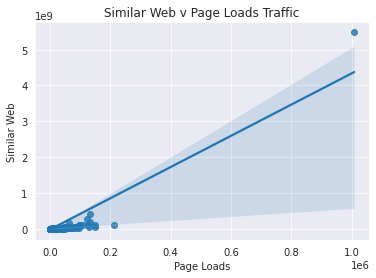

In [116]:
sns.regplot(data=merged, x="visits1", y="visits2").set(title='Similar Web v Page Loads Traffic', xlabel='Page Loads', ylabel='Similar Web')

In [103]:
merged.corr(method = 'pearson')

,visits1,visits2
visits1,1.000000,0.906047
visits2,0.906047,1.000000


### Same tests as above but without Ohtanis major outlier point

In [104]:
test = merged[1:]

In [105]:
test

,visits1,visits2
player_id,,
592178,131643,410285810.0
453286,123582,279712808.0
594798,132474,177552414.0
545361,63261,170552360.0
665489,211209,112588396.0
...,...,...
517031,6,65249.0
202017,2,65249.0
669364,602,45940.0


In [114]:
sns.set_style('darkgrid')

[Text(0.5, 1.0, 'Similar Web v Page Loads Traffic'),
 Text(0.5, 0, 'Page Loads'),
 Text(0, 0.5, 'Similar Web')]

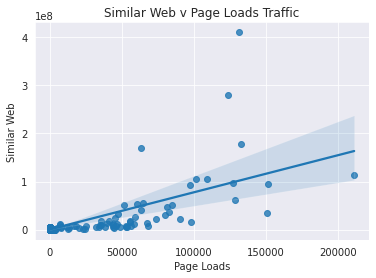

In [115]:
sns.regplot(data=test, x="visits1", y="visits2").set(title='Similar Web v Page Loads Traffic', xlabel='Page Loads', ylabel='Similar Web')

In [113]:
test.corr(method = 'pearson')

,visits1,visits2
visits1,1.000000,0.696215
visits2,0.696215,1.000000
